# Learner Playground

Notebook created with the intent of offering a handy environment to test out learners and simulations.

#### Import statements
Used to import local functions/modules or external libraries inside the notebook.

In [1]:
from ola2022_project.environment.environment import example_environment, Step, UserClassParameters
from ola2022_project.simulation.simulation import Simulation, create_n, simulate_n 
from ola2022_project.learners import *
from ola2022_project.algorithms.multi_armed_bandits import Mab

import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Additional import statements

#### Plotting functions
Functions used to plot data onto a graph for an immediate visualization and analysis.

In [3]:
# Helper function that computes the means for n slices of a given dimension for an array
def mean_slices(array, dim, n):
    ret = []
    for i in range(n):
        ret.append(np.mean(array[i * dim : dim * (i + 1)]))
    return ret

# Plot colors
colors = ['aqua', 'black', 'blue', 'blueviolet', 'burlywood', 'cadetblue', 'chocolate', 
          'coral', 'crimson', 'cyan', 'forestgreen', 'fuchsia', 'gold', 'green', 'hotpink', 
          'indigo', 'lime', 'magenta','navy', 'orange', 'purple', 'red', 'salmon', 
          'silver', 'teal', 'turquoise', 'violet']
n_colors = len(colors)

In [4]:
# Function used for quickly plotting multiple experiments onto a graph
def plot_experiments_days(n_days, rewards, days_step=1, show_mean=True, 
                          cumulate=False, show_markers=True, legend=True,
                          names=None):
    # Encapsulate the rewards in a list if the dimensionality is 1
    plot_rewards = rewards
    if np.ndim(rewards) == 1:
        plot_rewards = [rewards]
    # Calculating and shaping data that is going to be shown on the graph
    days = np.arange(1, n_days + 1, days_step)
    n_exp = len(plot_rewards)
    new_n_days = len(days)
    plot_rewards = \
            np.array(list(map(lambda r: mean_slices(r, days_step, new_n_days), plot_rewards)))
    if(cumulate):
        plot_rewards = np.array(list(map(lambda r: np.cumsum(r), plot_rewards)))
    # Graphical tuning
    marker = "." if show_markers else ""
    plot_colors = \
            random.sample(colors, n_exp) if n_exp <= n_colors else random.choice(colors, n_exp)
    plot_names = ["Experiment {n}" for i in range(len(plot_rewards))]
    if names and len(names) >= len(plot_rewards):
        plot_names = names
    # Creating a new figure and plotting the data onto it
    plt.figure()
    for i, reward in enumerate(plot_rewards):
        plt.plot(days, reward, label=plot_names[i].format(n=i+1), marker=marker, 
                 linestyle='-', color=plot_colors[i])
        if(show_mean):
            mean = [np.mean(plot_rewards[i])] * new_n_days
            plt.plot(days, mean, label="Mean of " + plot_names[i].format(n=i+1), 
                     linestyle='--', color=plot_colors[i])
    # Setting labels and showing the figure
    plt.xlabel("days")
    plt.ylabel("reward")
    if legend:
        plt.legend(loc = "best")
        
    plt.show()

In [5]:
# Additional plotting functions

#### Environment setup
Create the environment reference with customizable parameters.

In [6]:
# Random Number Generator used as a source of randomness by the environment and the simulation
rng = np.random.default_rng()

# Environment separated default parameters
env_classes_parameters = [
        [
            UserClassParameters(10, 0.2, 120),
            UserClassParameters(10, 0.15, 120),
            UserClassParameters(8, 0.3, 300),
            UserClassParameters(7, 0.1, 220),
            UserClassParameters(14, 0.25, 170),
        ],
        [
            UserClassParameters(22, 0.95, 190),
            UserClassParameters(20, 0.1, 210),
            UserClassParameters(16, 0.15, 240),
            UserClassParameters(24, 0.2, 80),
            UserClassParameters(20, 0.05, 360),
        ],
        [
            UserClassParameters(33, 0.4, 180),
            UserClassParameters(25, 0.15, 210),
            UserClassParameters(30, 0.15, 240),
            UserClassParameters(31, 0.1, 300),
            UserClassParameters(36, 0.1, 420),
        ],
    ]

In [7]:
# Creating the environment
env = example_environment(
    total_budget=200,
    class_ratios=[0.3, 0.6, 0.1],
    product_prices=[3, 15, 8, 22, 1],
    classes_parameters=env_classes_parameters,
    lam=0.5,
    max_items=3,
    graph_fully_connected=True,
    graph_zeros_probability=0.5,
    next_products=[(2, 3), (0, 2), (1, 4), (4, 1), (3, 0)],
    random_noise=0
)

In [8]:
# Additional environment tuning

#### Running the simulation
Execute the simulation and collect the results.

In [9]:
# Simulation separated default parameters
sim_n_days = 50
sim_n_experiments = 2

In [10]:
# Creating the simulation
simulation = Simulation(
    rng,
    env,
    step=Step.ONE,
    n_budget_steps=200,
    population_mean=100,
    population_variance=0,
    mab_algorithm=Mab.GPTS,
)

In [11]:
# Creating multiple simulations
simulations = create_n(
    rng,
    env,
    step=Step.ONE,
    n=sim_n_experiments,
    n_budget_steps=200,
    population_mean=100,
    population_variance=10,
    mab_algorithm=Mab.GPUCB1,
)

In [12]:
# Running the simulation
simulation.simulate(sim_n_days)
rewards = simulation.rewards

days:   0%|          | 0/50 [00:00<?, ?it/s]

In [13]:
# Running multiple simulations
# rewards = simulate_n(simulations, sim_n_days)

In [14]:
# Additional execution code

#### Plotting the results
Once the simulation has been run, collect the results and display them nicely using plotting functions.

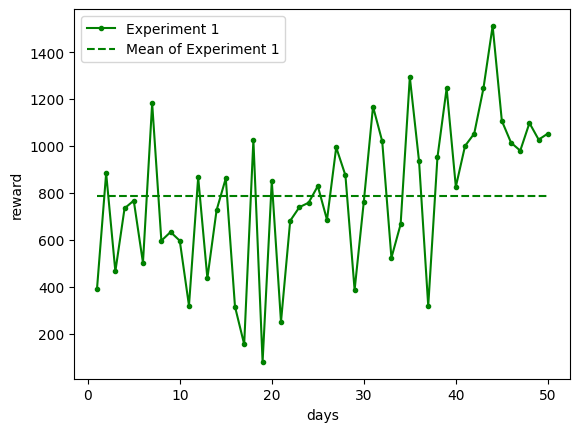

In [15]:
# Plotting the experiment
plot_experiments_days(sim_n_days, rewards, days_step=1, 
                      show_mean=True, cumulate=False, show_markers=True, 
                      legend=True, names=["Experiment {n}"])

In [16]:
# Additional plotting
regret = 1200 - rewards
for i in range(len(regret)):
    if regret[i] < 0:
        regret[i] = 0

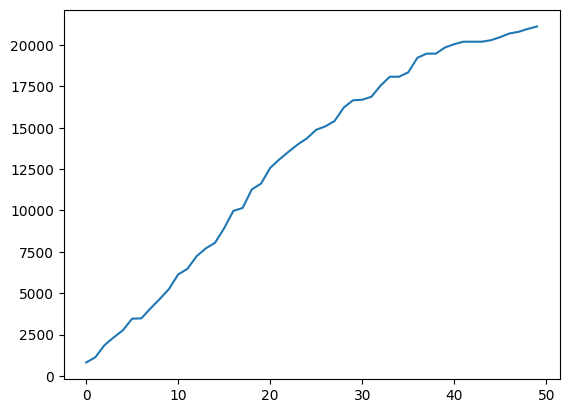

In [17]:
plt.plot(np.cumsum(regret))

In [25]:
from ola2022_project.environment.environment import get_day_of_interactions
a = get_day_of_interactions(rng, 1000, [20,20,20,20,20], env, deterministic=True)

TypeError: get_day_of_interactions() got an unexpected keyword argument 'deterministic'

In [23]:
foo = [elem.items_bought for elem in a if elem.landed_on == 0]
